In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
india_stations_df = pd.read_pickle('../2015-2020-pm25/india_stations.pkl')
india_stations_pm25_list = pd.read_pickle('../2015-2020-pm25/india_stations_pm25.pkl')

In [3]:
import configparser

config = configparser.ConfigParser()
config.read("./config.ini")

city = "Mumbai"

START = config['period']['start_date']
END   = config['period']['end_date']

In [4]:
city_station_ids = india_stations_df[india_stations_df['City'] == city]['StationId'].values

In [5]:
city_stations_pm25_list = []

for df in india_stations_pm25_list:
    if df['StationId'].values[0] in city_station_ids:
        city_stations_pm25_list.append(df)

In [6]:
india_stations_df

,StationName,StationId,City,Latitude,Longitude
0,"Secretariat, Amaravati - APPCB",AP001,Amaravati,16.504561,80.523517
1,"GVM Corporation, Visakhapatnam - APPCB",AP005,Visakhapatnam,17.748887,83.247789
2,"Railway Colony, Guwahati - APCB",AS001,Guwahati,26.179587,91.784315
3,"DRM Office Danapur, Patna - BSPCB",BR005,Patna,25.585624,85.044299
4,"Govt. High School Shikarpur, Patna - BSPCB",BR006,Patna,25.587980,85.094986
...,...,...,...,...,...
122,"Fort William, Kolkata - WBPCB",WB009,Kolkata,22.554246,88.335874
123,"Jadavpur, Kolkata - WBPCB",WB010,Kolkata,22.495500,88.370900
124,"Rabindra Bharati University, Kolkata - WBPCB",WB011,Kolkata,22.584454,88.359384
125,"Rabindra Sarobar, Kolkata - WBPCB",WB012,Kolkata,22.512145,88.363695


In [7]:
# idx = np.random.randint(len(city_stations_pm25_list))
idx = 4
station_df = city_stations_pm25_list[idx][:END]

In [8]:
station_id = station_df['StationId'].values[0]
station_data = india_stations_df[india_stations_df['StationId'] == station_id].values[0]

station_df['Place'] = station_data[0]
station_df['City'] = station_data[1]
station_df['Latitude'] = station_data[3]
station_df['Longitude'] = station_data[4]

<ipython-input-8-ae0d2c0a6eee>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['Place'] = station_data[0]
<ipython-input-8-ae0d2c0a6eee>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df['City'] = station_data[1]
<ipython-input-8-ae0d2c0a6eee>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/

In [9]:
station_df.head()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2019-06-04,MH010,26.93,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2019-06-05,MH010,29.83,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2019-06-06,MH010,15.19,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2019-06-07,MH010,14.90,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2019-06-08,MH010,16.05,"Powai, Mumbai - MPCB",MH010,19.125,72.906


In [10]:
station_df.tail()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2020-03-11,MH010,15.44,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2020-03-12,MH010,19.42,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2020-03-13,MH010,24.96,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2020-03-14,MH010,28.79,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2020-03-15,MH010,47.21,"Powai, Mumbai - MPCB",MH010,19.125,72.906


In [11]:
def plot_ts(df, name, columns=['PM2.5']):
    fig = plt.figure(figsize=(18, 4))
    df[columns].plot(c='k', ax=fig.gca())
    plt.title(name)
    plt.ylabel('PM2.5')
    plt.grid(ls='--')
    plt.show()

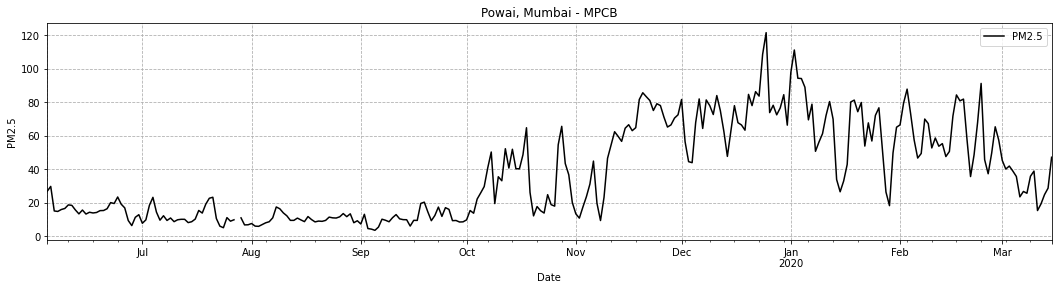

In [12]:
plot_ts(station_df, station_data[0])

In [13]:
station_df[station_df['PM2.5'].isnull()]

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2019-07-28,MH010,NaN,"Powai, Mumbai - MPCB",MH010,19.125,72.906


In [14]:
def previous_window_impute(station_df, window_length=7):
    column = "PM2.5"
    try:
        for idx, value in enumerate(station_df[column].values):
            if np.isnan(value):
                station_df[column][idx] = station_df[column][idx - window_length]
    except:
        pass
    return station_df

In [15]:
station_df = previous_window_impute(station_df)

<ipython-input-14-c3269d34fd44>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df[column][idx] = station_df[column][idx - window_length]
<ipython-input-15-cc740762f2d6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  station_df = previous_window_impute(station_df)


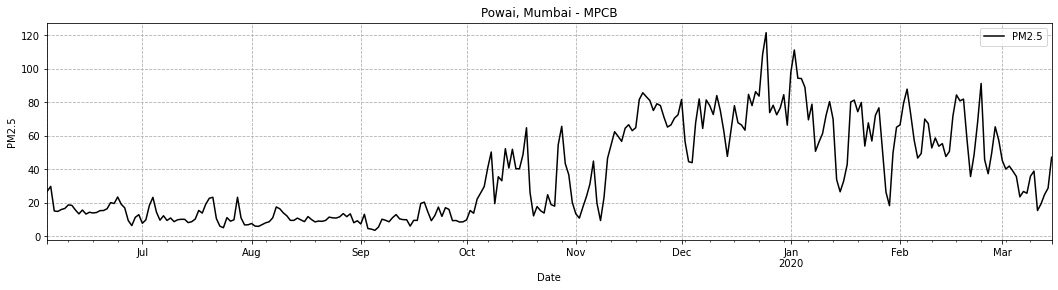

In [16]:
plot_ts(station_df, station_data[0])

In [17]:
station_df.index.freq = 'D'
station_df.head()

,StationId,PM2.5,Place,City,Latitude,Longitude
Date,,,,,,
2019-06-04,MH010,26.93,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2019-06-05,MH010,29.83,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2019-06-06,MH010,15.19,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2019-06-07,MH010,14.90,"Powai, Mumbai - MPCB",MH010,19.125,72.906
2019-06-08,MH010,16.05,"Powai, Mumbai - MPCB",MH010,19.125,72.906


In [18]:
station_pm25_df = pd.DataFrame(station_df['PM2.5'])

In [19]:
station_pm25_df.head()

,PM2.5
Date,
2019-06-04,26.93
2019-06-05,29.83
2019-06-06,15.19
2019-06-07,14.90
2019-06-08,16.05


In [20]:
reframed_df = station_pm25_df
ratio = 0.3

length = len(reframed_df)
limit = (int)(ratio * length)

training_set, test_set = reframed_df.values[:-limit], reframed_df.values[-limit:]
test_idx_values = reframed_df.index.to_pydatetime()[-limit:]
days = len(test_idx_values)

In [21]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.holtwinters import ExponentialSmoothing


import warnings
warnings.filterwarnings('ignore')

In [22]:
def get_AR_model(training_set, test_set):
    
    predictions = np.array([])

    for i in range(0, days):
        model = AutoReg(training_set, lags=5)
        model_fit = model.fit()        
        prediction = model_fit.predict(start=len(training_set), end=len(training_set))
        predictions = np.append(predictions, prediction)
        training_set = np.append(training_set, test_set[i])
        
    score = {
        "r2_score": r2_score(test_set, predictions),
        "mae": mean_absolute_error(test_set, predictions), 
        "rmse": np.sqrt(mean_squared_error(test_set, predictions)),
        "mean": np.mean(test_set)
    }

    return model, score, None, predictions 

def get_ARIMA_model(training_set, test_set):
    
    predictions = np.array([])

    for i in range(0, days):
        model = SARIMAX(training_set)
        model_fit = model.fit()        
        prediction = model_fit.predict(start=len(training_set), end=len(training_set))
        predictions = np.append(predictions, prediction)
        training_set = np.append(training_set, test_set[i])
        
    score = {
        "r2_score": r2_score(test_set, predictions),
        "mae": mean_absolute_error(test_set, predictions), 
        "rmse": np.sqrt(mean_squared_error(test_set, predictions)),
        "mean": np.mean(test_set)
    }

    return model, score, None, predictions 

def get_HoltWinters_model(training_set, test_set):       
    
    t,d,s,p,b,r = 'add', False, 'mul', 7, False, False
    predictions = np.array([])

    for i in range(0, days):
        model = ExponentialSmoothing(training_set, trend=t, damped=d, seasonal=s, seasonal_periods=p)
        model_fit = model.fit(optimized=True, use_boxcox=b, remove_bias=r)        
        prediction = model_fit.predict(start=len(training_set), end=len(training_set))
        predictions = np.append(predictions, prediction)
        training_set = np.append(training_set, test_set[i])
        
    score = {
        "r2_score": r2_score(test_set, predictions),
        "mae": mean_absolute_error(test_set, predictions), 
        "rmse": np.sqrt(mean_squared_error(test_set, predictions)),
        "mean": np.mean(test_set)
    }

    return model, score, None, predictions

In [23]:
MODEL_LIST = [
    ('AR', get_AR_model),
    ('ARIMA', get_ARIMA_model),
    ('Holt-Winters', get_HoltWinters_model)
]

In [24]:
best = {}
best_score = 9e9

rows = []

predictions = {}
predictions['Actual'] = test_set.reshape(-1)

for name, model_fn in MODEL_LIST:
    regressor, score, scaler, preds = model_fn(training_set, test_set)
    row = [f"{name} Regression", score['mae'], score['rmse'], score['r2_score'], score['mean']]
    rows.append(row)
    
    predictions[name + " Regression"] = preds.reshape(-1)
    
    if score['rmse'] < best_score:
        best['station_name'] = station_data[0]
        best['name'] = name + " Regression"
        best['regressor'] = regressor
        best['scaler'] = scaler
        best['score'] = score      
        best['test_set_predictions'] = preds
        
        best_score = score['rmse']

model_dfs = pd.DataFrame(rows, columns=["model", "mae", "rmse", "r2_score", "mean"])
model_dfs

,model,mae,rmse,r2_score,mean
0,AR Regression,11.614303,14.997607,0.568041,60.576
1,ARIMA Regression,12.494923,15.936577,0.512260,60.576
2,Holt-Winters Regression,13.034405,16.540397,0.474600,60.576


In [25]:
print("Best Model: ", best['name'])
print("Score: ", best['score'])

Best Model:  AR Regression
Score:  {'r2_score': 0.5680414462054066, 'mae': 11.614303274456859, 'rmse': 14.997607324992346, 'mean': 60.576}


In [26]:
import datetime

test_idx_values += datetime.timedelta(days=1)

In [27]:
predictions_df = pd.DataFrame(predictions, index=test_idx_values)

In [28]:
predictions_df

,Actual,AR Regression,ARIMA Regression,Holt-Winters Regression
2019-12-23,86.32,73.527575,76.253122,87.558727
2019-12-24,83.66,82.241710,84.597786,88.005256
2019-12-25,108.50,82.243481,81.973915,79.649520
2019-12-26,121.49,104.678255,106.876685,107.188790
2019-12-27,73.82,116.707241,120.037906,116.852754
...,...,...,...,...
2020-03-12,15.44,36.193677,37.772685,38.323956
2020-03-13,19.42,15.302668,14.949393,15.239113
2020-03-14,24.96,23.205745,18.805055,19.831366
2020-03-15,28.79,28.694292,24.174166,25.288989


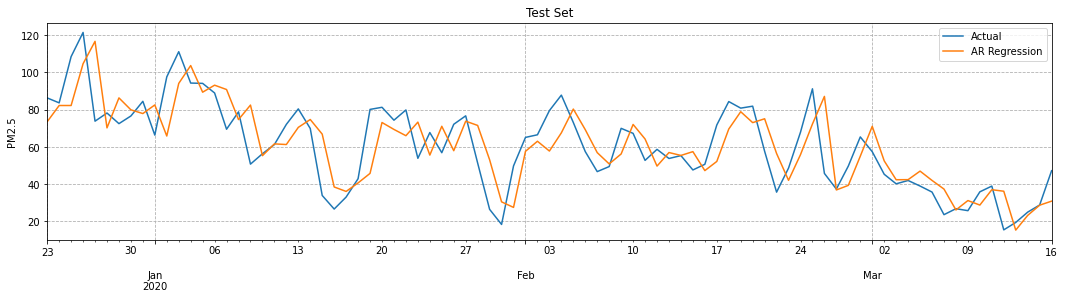

In [29]:
fig = plt.figure(figsize=(18, 4))
predictions_df[['Actual', best['name']]].plot(ax=fig.gca())
plt.title("Test Set")
plt.ylabel('PM2.5')
plt.grid(ls='--')

In [30]:
import pickle

with open("best_pm25_reg_model_statistical.pkl", "wb") as file:
    pickle.dump(best, file, protocol=4)